### Udacity Machine Learning : Capstone Project
Maryam Samim


In [1]:
#import all the needed libraries
import pandas as pd
import json
import numpy as np
import re
import matplotlib
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from numpy import concatenate
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from numpy import concatenate
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Data Preprocessing Step
Here we will take the following steps to preprocess our dataset.
1. read the dataset file which is a csv format
2. get only the columns that may impact yor predictions
3. Removing the extremely low salary from my data 
4. get the rows where the primary_job column value contains teach in it so that we only get teachers data
5. take care of columns with 0 and then drop those rows.


In [4]:
# Reading the dataset from a csv file
input_data = pd.read_csv('nj_teachers_salaries_2016.csv')

#Getting all the columns except the first two which is the first/last name 
input_data = input_data.iloc[:,2:]
#Filtering the very low salary data which will




input_data = input_data[input_data['salary']>10000]
input_data = input_data[input_data['salary']<100000]
#Filtering the data to only get the rows where the primary_job has teach in it
input_data = input_data[input_data['primary_job'].str.contains('Teach')]
input_data = input_data.replace(0, np.NaN)
print('input_data shape before dropna: ',input_data.shape)
input_data.dropna(inplace=True)
print(input_data.shape)
input_data.head(n=2)

input_data shape before dropna:  (16527, 13)
(14923, 13)


,county,district,school,primary_job,fte,salary,certificate,subcategory,teaching_route,highly_qualified,experience_district,experience_nj,experience_total
36,Atlantic,Atlantic City,New York Avenue School,Learning Disabilities Teacher Consultant,1.0,69941,Standard certificate,Special ed,Alternate,Doesn't need to be highly qualified,8.0,8.0,8.0
188,Atlantic,Atlantic City,Sovereign Avenue School,Elementary School Teacher K-5,1.0,71418,Standard certificate,General ed,Alternate,Highly qualified. Passed the Praxis/NTE,10.0,10.0,10.0


In [5]:

display(input_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14923 entries, 36 to 138714
Data columns (total 13 columns):
county                 14923 non-null object
district               14923 non-null object
school                 14923 non-null object
primary_job            14923 non-null object
fte                    14923 non-null float64
salary                 14923 non-null int64
certificate            14923 non-null object
subcategory            14923 non-null object
teaching_route         14923 non-null object
highly_qualified       14923 non-null object
experience_district    14923 non-null float64
experience_nj          14923 non-null float64
experience_total       14923 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.6+ MB


None

In [6]:
#statistical summary of the dataset
display(input_data.describe())

,fte,salary,experience_district,experience_nj,experience_total
count,14923.000000,14923.000000,14923.000000,14923.000000,14923.000000
mean,0.975398,65974.329089,8.917376,9.859077,10.123568
std,0.111515,14714.869190,7.047425,7.440325,7.604846
min,0.010000,11725.000000,1.000000,1.000000,1.000000
25%,1.000000,54822.500000,3.000000,4.000000,4.000000
50%,1.000000,62083.000000,8.000000,9.000000,9.000000
75%,1.000000,76096.000000,13.000000,14.000000,15.000000
max,1.000000,99955.000000,46.000000,48.000000,48.000000


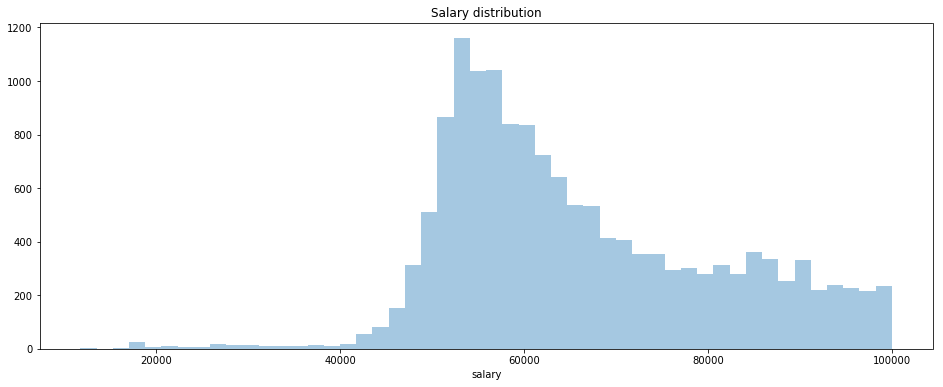

In [7]:
#Salary Distribution in dataset
#histogram
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
h = sns.distplot(input_data['salary'], bins=50, kde=False)
plt.title('Salary distribution')
h.figure.set_size_inches(16,6)
plt.show()

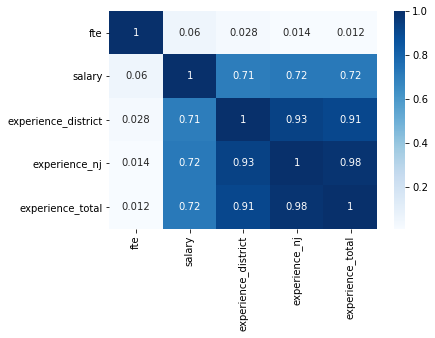

In [8]:

# visulize correlations of features with a heatmap# visuli 
plt.figure(figsize=(6,4))
sns.heatmap(input_data.corr(),annot=True, cmap="Blues")
plt.show()


In [9]:
display([x for x in input_data['certificate'].unique()])

['Standard certificate',
 'CE',
 'Provisional',
 'CEAS',
 'Emergency',
 'Non Citizen',
 'X']

In [10]:
# to see what get_dummy's output is :
input_data2 = pd.get_dummies(input_data['certificate'], prefix='certificate')
display(input_data2.tail())

,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,certificate_Standard certificate,certificate_X
138684,0,0,0,0,1,0,0
138685,0,1,0,0,0,0,0
138689,0,0,0,0,0,1,0
138694,0,0,0,0,0,1,0
138714,0,0,0,0,0,1,0


In [11]:
#Using label encoder for my categorical data which has more than two values
#Encode County first:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ohe= preprocessing.OneHotEncoder()




#input_data = input_data.drop(['certificate','county','district', 'school','primary_job',
#                              'subcategory','teaching_route','highly_qualified' ], axis=1)
#there are some blanks in our certificate column, so replace by word blank where
# we will label encode them anyway 
input_data.certificate.fillna(value='blank', inplace=True)
input_data.certificate.replace(np.inf, 0)
input_data.fte.fillna(value=0, inplace=True)
input_data.fte.replace(np.inf, 0)
input_data.salary.fillna(value=0, inplace=True)
input_data.salary.replace(np.inf, 0)
#input_data.experience_district.fillna(value=0, inplace=True)
input_data.experience_district.replace(np.inf, 0)
input_data.experience_nj.fillna(value=0, inplace=True)
input_data.experience_nj.replace(np.inf, 0)
input_data.experience_total.fillna(value=0, inplace=True)
input_data.experience_total.replace(np.inf, 0)

'''df_with_dummies = pd.get_dummies( input_data, columns = ['certificate','primary_job','subcategory',
                                                         'teaching_route', 'highly_qualified'])
'''
input_data = pd.concat([input_data,pd.get_dummies(input_data['certificate'], prefix='certificate')],axis=1)
input_data = pd.concat([input_data,pd.get_dummies(input_data['primary_job'], prefix='primary_job')],axis=1)
input_data = pd.concat([input_data,pd.get_dummies(input_data['subcategory'], prefix='subcategory')],axis=1)
input_data = pd.concat([input_data,pd.get_dummies(input_data['teaching_route'], prefix='teaching_route')],axis=1)
input_data = pd.concat([input_data,pd.get_dummies(input_data['highly_qualified'], prefix='highly_qualified')],axis=1)

display(input_data.head())

,county,district,school,primary_job,fte,salary,certificate,subcategory,teaching_route,highly_qualified,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
36,Atlantic,Atlantic City,New York Avenue School,Learning Disabilities Teacher Consultant,1.0,69941,Standard certificate,Special ed,Alternate,Doesn't need to be highly qualified,...,0,0,1,0,0,0,0,0,0,0
188,Atlantic,Atlantic City,Sovereign Avenue School,Elementary School Teacher K-5,1.0,71418,Standard certificate,General ed,Alternate,Highly qualified. Passed the Praxis/NTE,...,0,0,0,0,0,0,0,1,0,0
259,Atlantic,Atlantic City,Atlantic City High School,Elementary Teacher In Secondary Setting Apa On...,1.0,71418,Standard certificate,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,...,1,0,0,0,0,0,0,1,0,0
267,Atlantic,Atlantic City,District Office,Teacher Coach,1.0,95680,Standard certificate,General ed,Traditional,Highly qualified. Passed the Praxis/NTE,...,1,0,0,0,0,0,0,1,0,0
268,Atlantic,Atlantic City,District Office,Teacher Coordinator,1.0,73049,Standard certificate,General ed,Traditional,Highly qualified. Passed the Praxis/NTE,...,1,0,0,0,0,0,0,1,0,0


In [12]:
input_data = input_data.drop(['county','district','school','primary_job','certificate','subcategory','teaching_route','highly_qualified'], axis=1)


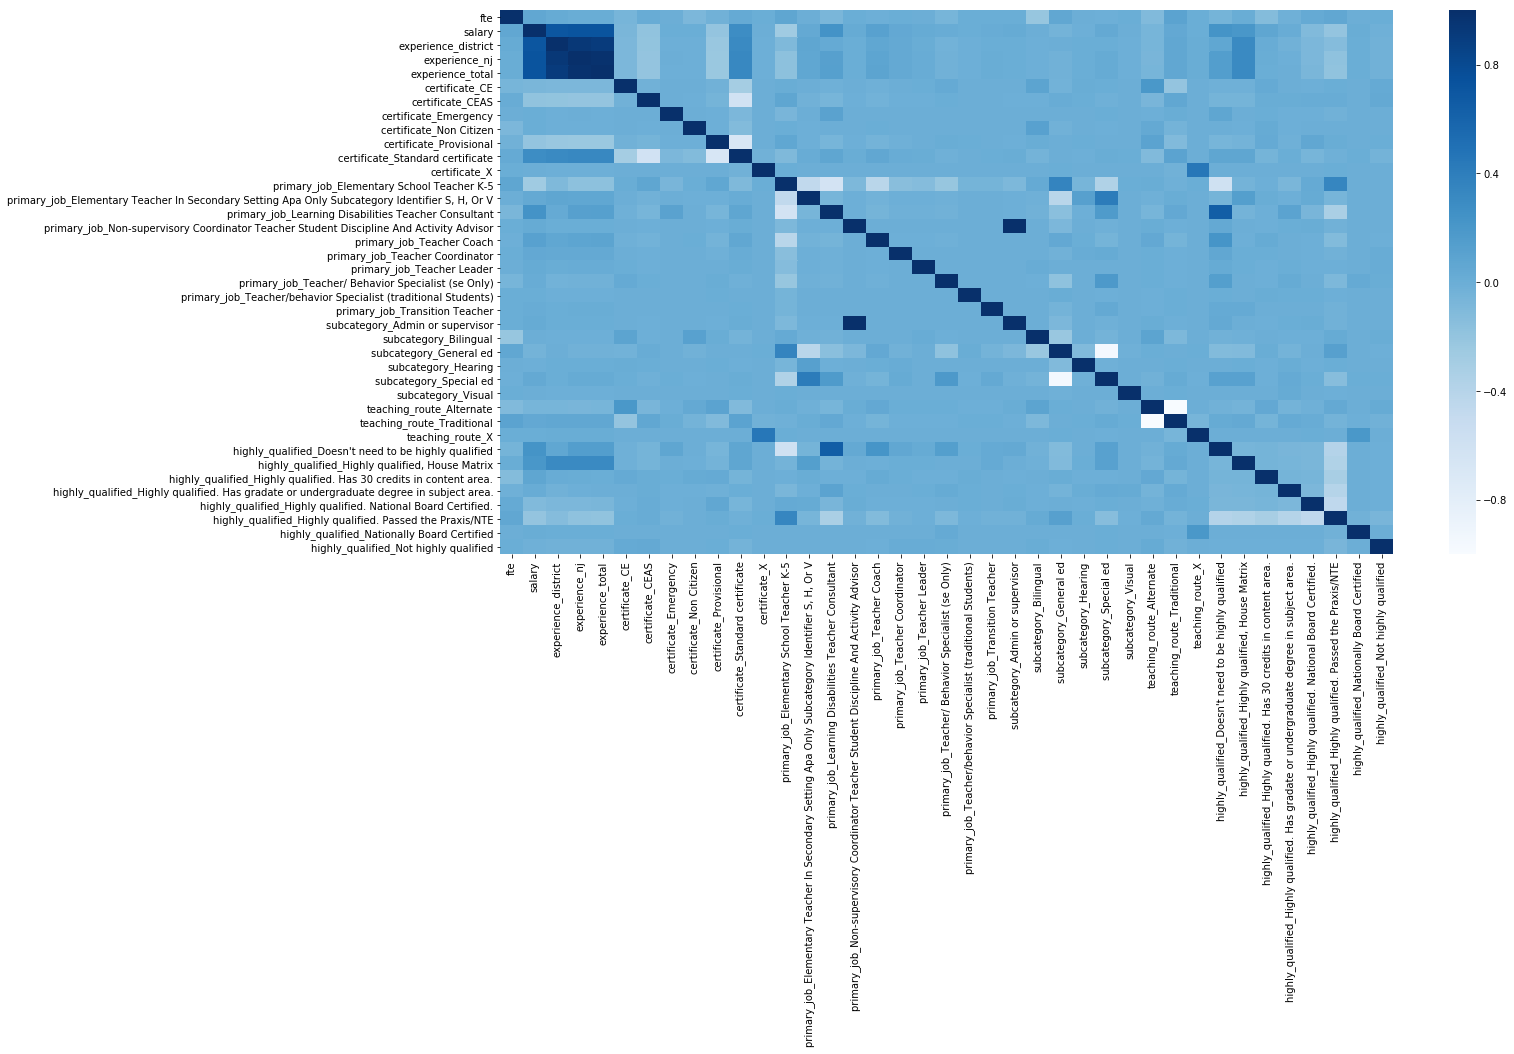

In [13]:
# visulize correlations of features with a heatmap# visuli 
#pd.scatter_matrix(input_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.figure(figsize=(20,10))
sns.heatmap(input_data.corr(), cmap="Blues")
#sns.heatmap(input_data.corr())
plt.show()

In [14]:
input_data2 = input_data
scaling = MinMaxScaler(feature_range=(0,1)).fit(input_data2)
input_data2 = pd.DataFrame(scaling.transform(input_data2))

In [15]:
# Produce a scatter matrix for each pair of features in the data\
#pd.plotting.scatter_matrix(input_data2, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

#input_data2.corr()

In [16]:

input_data = input_data[input_data['salary']>5000]
y= input_data['salary']
x=input_data.drop(['salary'], axis=1) 
#split your dataset to training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0) 

In [17]:
x_train.head()

,fte,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,certificate_Standard certificate,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
34713,1.0,4.0,4.0,4.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
9771,1.0,8.0,8.0,12.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
108521,1.0,17.0,17.0,22.0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
108330,0.6,12.0,14.0,14.0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
97558,1.0,11.0,11.0,11.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [18]:

from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)
(pd.DataFrame(x_train)).head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.00000,0.068182,0.063830,0.063830,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.00000,0.159091,0.148936,0.234043,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.00000,0.363636,0.340426,0.446809,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.59596,0.250000,0.276596,0.276596,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.00000,0.227273,0.212766,0.212766,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
#  Create a decision tree regressor and fit it to the training set
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train)
#  Report the score of the prediction using the testing set
score = dt_regressor.score(x_test, y_test)
#print ('The score is ', score)
y_pred = dt_regressor.predict(x_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)
print('Test r^2 score: %.3f' % r2_score(y_test, y_pred))

Test RMSE: 10560.427
Test r^2 score: 0.495


In [20]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

# Predicting a new result
y_pred = regressor.predict(x_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)
print('Test r^2 score: %.3f' % r2_score(y_test, y_pred))


Test RMSE: 9605.618
Test r^2 score: 0.582


In [21]:

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [15,20,25],
    'max_features': [6,7,8],
    'min_samples_leaf': [2,3],
    'min_samples_split': [20,22,24],
    'n_estimators': [150,180, 190]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
gs = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [22]:
gs = gs.fit(x_train, y_train)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  1.7min finished


In [23]:
print(gs.best_score_)
print(gs.best_params_)

0.6255662781542803
{'max_depth': 20, 'min_samples_leaf': 2, 'bootstrap': True, 'min_samples_split': 20, 'n_estimators': 150, 'max_features': 8}


In [24]:
#this will be out best model for the random Forest

my_model =gs.best_estimator_
y_p = my_model.predict(x_test)
rmse = math.sqrt(mean_squared_error(y_test, y_p))
print('Test RMSE: %.3f' % rmse)
print('Test r^2 score: %.3f' % r2_score(y_test, y_p))

Test RMSE: 9056.140
Test r^2 score: 0.629


In [25]:
'''import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(x_train,y_train)
predictions = xgb.predict(x_test)
print(explained_variance_score(predictions,y_test))'''

'import xgboost\nxgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,\n                           colsample_bytree=1, max_depth=7)\nxgb.fit(x_train,y_train)\npredictions = xgb.predict(x_test)\nprint(explained_variance_score(predictions,y_test))'

In [29]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_regressor= SVR(kernel='linear',cache_size=7000)
svr_regressor.fit(x_train, y_train)

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
# Create a based model
svr_reg = SVR()
# Instantiate the grid search model
gs = GridSearchCV(estimator = svr_reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [30]:
gs = gs.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.1min finished


In [31]:
print(gs.best_score_)
print(gs.best_params_)

0.5754626275148592
{'kernel': 'linear', 'C': 1000}


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
def baseline_model():
    model = Sequential()
    model.add(Dense(6, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# fix random seed for reproducibility
seed = 7

np.random.seed(seed)
estimators = []
estimators.append(('minmax', MinMaxScaler(feature_range=(-1, 1))))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=30, batch_size=5, verbose=2)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=2, random_state=seed)
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
print (pipeline.fit(x_train, y_train))

In [ ]:

y_pred = pipeline.predict(x_test)

In [ ]:
print(y_pred)

In [ ]:
from numpy import concatenate
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)
print('Test r^2 score: %.3f' % r2_score(y_test, y_pred))

In [ ]:
input_data=input_data.replace([np.inf, -np.inf], np.nan)

input_data = input_data.replace([np.inf, -np.inf], np.nan).dropna(how="all")

# TODO: Scale the data using the natural logarithm
log_data = np.log(input_data)



# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [27]:
###FIND THE OUTLIERS
# For each feature find the data points with extreme high or low values
for feature in input_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(input_data[feature], 25.)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(input_data[feature], 75.)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(input_data[~((input_data[feature] >= Q1 - step) & (input_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
#outliers  =[65, 66, 75, 128, 154] # [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fte':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
362,0.50,65616,9.0,9.0,12.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
424,0.50,82152,13.0,13.0,13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
583,0.50,18500,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
605,0.50,85108,13.0,13.0,13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
674,0.50,98774,16.0,16.0,16.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
922,0.50,67704,9.0,9.0,9.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
940,0.50,91733,14.0,14.0,14.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
949,0.50,90824,19.0,19.0,19.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1871,0.50,53260,2.0,2.0,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1902,0.50,83543,16.0,17.0,17.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'salary':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
583,0.50,18500,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
639,1.00,18500,2.0,2.0,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7784,1.00,18500,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
15149,1.00,18500,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
15158,1.00,18500,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
29062,0.30,17852,3.0,10.0,10.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
29519,1.00,18500,4.0,4.0,4.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
29610,1.00,18500,6.0,6.0,6.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
29769,1.00,18500,3.0,3.0,3.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
33968,1.00,22507,2.0,2.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'experience_district':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
853,1.0,95784,34.0,34.0,34.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1138,1.0,92409,31.0,31.0,31.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1214,1.0,96447,30.0,30.0,30.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1439,1.0,98412,29.0,29.0,29.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1540,1.0,93068,30.0,30.0,30.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1555,1.0,83346,31.0,31.0,31.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1601,1.0,92409,30.0,30.0,30.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1750,1.0,86383,29.0,29.0,29.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2361,1.0,82959,40.0,40.0,40.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2436,1.0,82660,32.0,32.0,32.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


Data points considered outliers for the feature 'experience_nj':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
853,1.00,95784,34.0,34.0,34.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1138,1.00,92409,31.0,31.0,31.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1214,1.00,96447,30.0,30.0,30.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1540,1.00,93068,30.0,30.0,30.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1555,1.00,83346,31.0,31.0,31.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1601,1.00,92409,30.0,30.0,30.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1701,1.00,83021,26.0,32.0,32.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2361,1.00,82959,40.0,40.0,40.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2436,1.00,82660,32.0,32.0,32.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2547,1.00,86543,37.0,37.0,37.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


Data points considered outliers for the feature 'experience_total':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
853,1.00,95784,34.0,34.0,34.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1701,1.00,83021,26.0,32.0,32.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2361,1.00,82959,40.0,40.0,40.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2436,1.00,82660,32.0,32.0,32.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2547,1.00,86543,37.0,37.0,37.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2716,1.00,89793,29.0,34.0,34.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4251,1.00,82763,21.0,37.0,37.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4260,1.00,86700,32.0,32.0,32.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4433,1.00,95141,33.0,33.0,33.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4462,1.00,95141,40.0,40.0,40.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


Data points considered outliers for the feature 'certificate_CE':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
415,1.0,49784,16.0,16.0,16.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
583,0.5,18500,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
659,1.0,43952,2.0,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1062,1.0,55260,2.0,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1982,1.0,54668,2.0,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2371,1.0,70073,10.0,10.0,10.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3886,1.0,53494,1.0,1.0,1.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4745,1.0,55000,1.0,3.0,4.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5896,1.0,51202,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6222,1.0,37538,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'certificate_CEAS':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
639,1.00,18500,2.0,2.0,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1127,1.00,57669,2.0,2.0,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1871,0.50,53260,2.0,2.0,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2103,0.74,51338,1.0,1.0,1.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2138,1.00,35212,1.0,1.0,1.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2341,1.00,48134,2.0,2.0,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2358,1.00,68023,5.0,5.0,5.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3069,1.00,52476,1.0,1.0,1.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3613,1.00,48032,2.0,2.0,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3633,1.00,32680,4.0,4.0,4.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'certificate_Emergency':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
5363,1.0,57376,1.0,1.0,1.0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
12878,1.0,50540,1.0,6.0,6.0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
25919,1.0,59665,7.0,7.0,7.0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
26151,1.0,69103,17.0,17.0,17.0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
26218,1.0,87882,2.0,2.0,2.0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
26703,1.0,69503,6.0,6.0,6.0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
40233,0.8,76303,6.0,14.0,14.0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
66117,0.8,60751,1.0,1.0,1.0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
92083,1.0,81100,10.0,10.0,10.0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
105351,1.0,54792,4.0,4.0,4.0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


Data points considered outliers for the feature 'certificate_Non Citizen':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
31064,0.5,54557,1.0,1.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
45951,1.0,96706,15.0,15.0,27.0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
61469,1.0,62563,7.0,7.0,7.0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
61491,1.0,64772,15.0,15.0,15.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
83490,1.0,60527,3.0,3.0,3.0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
95476,1.0,54728,4.0,4.0,4.0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
112797,0.5,58000,1.0,1.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
112916,1.0,53160,4.0,4.0,4.0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
117757,1.0,56626,8.0,8.0,12.0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
118288,1.0,52211,3.0,3.0,3.0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'certificate_Provisional':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
545,1.0,52176,5.0,5.0,5.0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
1051,1.0,54668,4.0,4.0,4.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1053,1.0,52214,1.0,1.0,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1869,1.0,53896,4.0,4.0,4.0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1961,1.0,52622,4.0,4.0,4.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2069,1.0,49084,1.0,1.0,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2421,1.0,55872,7.0,7.0,7.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2425,1.0,53260,4.0,4.0,4.0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2984,1.0,50050,1.0,1.0,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3224,1.0,51300,1.0,1.0,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'certificate_Standard certificate':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
415,1.00,49784,16.0,16.0,16.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
545,1.00,52176,5.0,5.0,5.0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
583,0.50,18500,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
639,1.00,18500,2.0,2.0,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
659,1.00,43952,2.0,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1051,1.00,54668,4.0,4.0,4.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1053,1.00,52214,1.0,1.0,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1062,1.00,55260,2.0,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1127,1.00,57669,2.0,2.0,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1869,1.00,53896,4.0,4.0,4.0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


Data points considered outliers for the feature 'certificate_X':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
50934,1.0,54875,3.0,3.0,3.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'primary_job_Elementary School Teacher K-5':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
36,1.00,69941,8.0,8.0,8.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
259,1.00,71418,3.0,3.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
267,1.00,95680,17.0,17.0,17.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
268,1.00,73049,2.0,2.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
270,1.00,98774,11.0,11.0,11.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
271,1.00,55547,6.0,6.0,6.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
362,0.50,65616,9.0,9.0,12.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
424,0.50,82152,13.0,13.0,13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
473,1.00,98774,16.0,16.0,16.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
491,1.00,95680,13.0,13.0,13.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'primary_job_Elementary Teacher In Secondary Setting Apa Only Subcategory Identifier S, H, Or V':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
259,1.0,71418,3.0,3.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
836,1.0,94135,12.0,12.0,12.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
837,1.0,93567,9.0,9.0,9.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
841,1.0,94135,15.0,15.0,15.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
842,1.0,98206,10.0,10.0,10.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
844,1.0,94135,12.0,12.0,12.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
845,1.0,88318,14.0,14.0,14.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1051,1.0,54668,4.0,4.0,4.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1053,1.0,52214,1.0,1.0,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1060,1.0,57579,9.0,9.0,9.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'primary_job_Learning Disabilities Teacher Consultant':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
36,1.00,69941,8.0,8.0,8.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
853,1.00,95784,34.0,34.0,34.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
869,1.00,84543,11.0,17.0,17.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
922,0.50,67704,9.0,9.0,9.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
940,0.50,91733,14.0,14.0,14.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
949,0.50,90824,19.0,19.0,19.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
957,1.00,76534,13.0,13.0,13.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1171,1.00,65142,4.0,12.0,12.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1374,1.00,84964,15.0,15.0,15.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1741,1.00,85433,12.0,12.0,12.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


Data points considered outliers for the feature 'primary_job_Non-supervisory Coordinator Teacher Student Discipline And Activity Advisor':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
18336,1.0,78874,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
35842,1.0,59804,4.0,4.0,4.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
109522,1.0,95000,9.0,14.0,14.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
110353,1.0,99027,23.0,23.0,23.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
110360,1.0,73274,15.0,15.0,15.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
110372,1.0,69573,5.0,5.0,5.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
110380,1.0,71673,16.0,16.0,16.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
111108,1.0,66909,18.0,18.0,18.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
111646,1.0,99512,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
112016,1.0,94109,17.0,17.0,17.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


Data points considered outliers for the feature 'primary_job_Teacher Coach':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
267,1.00,95680,17.0,17.0,17.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
270,1.00,98774,11.0,11.0,11.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
271,1.00,55547,6.0,6.0,6.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
362,0.50,65616,9.0,9.0,12.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
424,0.50,82152,13.0,13.0,13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
473,1.00,98774,16.0,16.0,16.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
491,1.00,95680,13.0,13.0,13.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
605,0.50,85108,13.0,13.0,13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
674,0.50,98774,16.0,16.0,16.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
688,1.00,89797,14.0,14.0,14.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Data points considered outliers for the feature 'primary_job_Teacher Coordinator':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
268,1.0,73049,2.0,2.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4260,1.0,86700,32.0,32.0,32.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4288,1.0,78852,25.0,25.0,25.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4467,1.0,74899,13.0,13.0,13.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4471,1.0,89171,21.0,21.0,21.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4487,1.0,89152,17.0,19.0,19.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4490,1.0,92552,28.0,28.0,28.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4509,1.0,85097,13.0,13.0,13.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4510,1.0,94817,26.0,26.0,26.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4549,1.0,94817,25.0,28.0,28.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


Data points considered outliers for the feature 'primary_job_Teacher Leader':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
3970,1.0,63012,13.0,13.0,13.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4251,1.0,82763,21.0,37.0,37.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4433,1.0,95141,33.0,33.0,33.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4462,1.0,95141,40.0,40.0,40.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
7494,0.2,81500,13.0,13.0,13.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7785,0.4,73000,10.0,10.0,10.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
18306,1.0,50982,1.0,1.0,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
23144,1.0,64450,9.0,9.0,9.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
25515,1.0,54462,1.0,15.0,19.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
38932,1.0,97752,15.0,19.0,19.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'primary_job_Teacher/ Behavior Specialist (se Only)':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
2358,1.00,68023,5.0,5.0,5.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6425,1.00,70070,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8523,0.40,49300,2.0,6.0,7.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9289,1.00,80800,3.0,3.0,3.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9581,1.00,96606,4.0,4.0,4.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
10311,0.30,78290,9.0,16.0,16.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
11175,0.60,80678,20.0,20.0,20.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
12335,0.80,68691,2.0,2.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
13936,1.00,68961,1.0,5.0,5.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
14056,1.00,95500,10.0,10.0,10.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


Data points considered outliers for the feature 'primary_job_Teacher/behavior Specialist (traditional Students)':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
17937,1.0,63965,2.0,2.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
17938,1.0,57465,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
39006,1.0,69573,3.0,3.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
39530,1.0,96140,17.0,17.0,17.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
60009,1.0,83230,5.0,5.0,10.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
135538,1.0,63037,7.0,7.0,7.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
137652,1.0,50000,3.0,3.0,3.0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


Data points considered outliers for the feature 'primary_job_Transition Teacher':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
14469,1.0,83719,14.0,15.0,15.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
14475,1.0,84231,14.0,14.0,17.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
14541,1.0,65023,5.0,7.0,7.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
15391,1.0,70914,20.0,20.0,20.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
15878,1.0,54300,1.0,2.0,2.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
67058,1.0,88855,12.0,35.0,35.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
83275,1.0,99650,11.0,11.0,11.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


Data points considered outliers for the feature 'subcategory_Admin or supervisor':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
18336,1.0,78874,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
35842,1.0,59804,4.0,4.0,4.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
109522,1.0,95000,9.0,14.0,14.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
110353,1.0,99027,23.0,23.0,23.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
110360,1.0,73274,15.0,15.0,15.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
110372,1.0,69573,5.0,5.0,5.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
110380,1.0,71673,16.0,16.0,16.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
111108,1.0,66909,18.0,18.0,18.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
111646,1.0,99512,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
112016,1.0,94109,17.0,17.0,17.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


Data points considered outliers for the feature 'subcategory_Bilingual':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
3812,1.0,52770,2.0,2.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5442,0.5,86178,15.0,15.0,15.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6712,1.0,81850,13.0,13.0,13.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7147,1.0,76185,5.0,5.0,5.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7157,1.0,70045,4.0,4.0,4.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7310,1.0,69535,1.0,1.0,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
7361,1.0,59805,6.0,6.0,6.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7365,1.0,76185,12.0,12.0,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7729,1.0,99158,15.0,15.0,15.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7760,1.0,55045,2.0,2.0,2.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


Data points considered outliers for the feature 'subcategory_General ed':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
36,1.0,69941,8.0,8.0,8.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
259,1.0,71418,3.0,3.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
348,1.0,52107,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
355,1.0,55378,3.0,3.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
416,1.0,67095,9.0,9.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
423,1.0,73792,9.0,9.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
510,1.0,58811,7.0,7.0,7.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
638,1.0,55696,3.0,3.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
755,1.0,54218,4.0,4.0,4.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
836,1.0,94135,12.0,12.0,12.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


Data points considered outliers for the feature 'subcategory_Hearing':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
4549,1.00,94817,25.0,28.0,28.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4893,1.00,72311,7.0,7.0,7.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
19569,1.00,55370,1.0,1.0,1.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
34735,0.70,58734,3.0,3.0,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
41900,1.00,84550,8.0,8.0,8.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
51068,1.00,55997,4.0,4.0,4.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
51077,1.00,71808,16.0,16.0,16.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
61167,1.00,78748,12.0,12.0,12.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
61169,1.00,51150,1.0,1.0,2.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
61172,1.00,59973,12.0,12.0,12.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'subcategory_Special ed':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
36,1.0,69941,8.0,8.0,8.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
259,1.0,71418,3.0,3.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
348,1.0,52107,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
355,1.0,55378,3.0,3.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
416,1.0,67095,9.0,9.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
423,1.0,73792,9.0,9.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
510,1.0,58811,7.0,7.0,7.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
638,1.0,55696,3.0,3.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
755,1.0,54218,4.0,4.0,4.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
836,1.0,94135,12.0,12.0,12.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


Data points considered outliers for the feature 'subcategory_Visual':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
136978,1.0,55128,2.0,2.0,2.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


Data points considered outliers for the feature 'teaching_route_Alternate':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
36,1.0,69941,8.0,8.0,8.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
188,1.0,71418,10.0,10.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
341,1.0,79102,11.0,11.0,11.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
354,1.0,58503,7.0,7.0,7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
383,1.0,68463,10.0,10.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
415,1.0,49784,16.0,16.0,16.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
416,1.0,67095,9.0,9.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
418,1.0,63247,8.0,8.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
423,1.0,73792,9.0,9.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
424,0.5,82152,13.0,13.0,13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'teaching_route_Traditional':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
36,1.0,69941,8.0,8.0,8.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
188,1.0,71418,10.0,10.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
341,1.0,79102,11.0,11.0,11.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
354,1.0,58503,7.0,7.0,7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
383,1.0,68463,10.0,10.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
415,1.0,49784,16.0,16.0,16.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
416,1.0,67095,9.0,9.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
418,1.0,63247,8.0,8.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
423,1.0,73792,9.0,9.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
424,0.5,82152,13.0,13.0,13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'teaching_route_X':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
25922,1.0,80081,22.0,23.0,23.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
50651,1.0,90823,27.0,27.0,27.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
50934,1.0,54875,3.0,3.0,3.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
50939,1.0,63073,10.0,10.0,10.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
51029,1.0,62245,12.0,12.0,12.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


Data points considered outliers for the feature 'highly_qualified_Doesn't need to be highly qualified':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
36,1.00,69941,8.0,8.0,8.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
853,1.00,95784,34.0,34.0,34.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
869,1.00,84543,11.0,17.0,17.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
922,0.50,67704,9.0,9.0,9.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
940,0.50,91733,14.0,14.0,14.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
949,0.50,90824,19.0,19.0,19.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
957,1.00,76534,13.0,13.0,13.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1171,1.00,65142,4.0,12.0,12.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1741,1.00,85433,12.0,12.0,12.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1750,1.00,86383,29.0,29.0,29.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


Data points considered outliers for the feature 'highly_qualified_Highly qualified, House Matrix':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
545,1.0,52176,5.0,5.0,5.0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
1205,1.0,86137,15.0,15.0,15.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1214,1.0,96447,30.0,30.0,30.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1498,1.0,72618,12.0,15.0,15.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1500,1.0,65142,8.0,11.0,11.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2226,1.0,75868,7.0,19.0,19.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2229,1.0,86543,27.0,27.0,27.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2264,1.0,58956,9.0,10.0,10.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2383,1.0,84543,12.0,19.0,19.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2430,1.0,86758,24.0,24.0,24.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


Data points considered outliers for the feature 'highly_qualified_Highly qualified. Has 30 credits in content area.':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
836,1.00,94135,12.0,12.0,12.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
837,1.00,93567,9.0,9.0,9.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
841,1.00,94135,15.0,15.0,15.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
842,1.00,98206,10.0,10.0,10.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
844,1.00,94135,12.0,12.0,12.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
845,1.00,88318,14.0,14.0,14.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2393,1.00,65142,10.0,11.0,11.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2421,1.00,55872,7.0,7.0,7.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2425,1.00,53260,4.0,4.0,4.0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3370,1.00,82588,19.0,19.0,19.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


Data points considered outliers for the feature 'highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
688,1.0,89797,14.0,14.0,14.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
755,1.0,54218,4.0,4.0,4.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1369,1.0,89900,18.0,18.0,18.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1373,1.0,65100,8.0,8.0,8.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1374,1.0,84964,15.0,15.0,15.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1392,1.0,80804,9.0,12.0,12.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1393,1.0,76644,12.0,12.0,12.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1396,1.0,84964,16.0,16.0,19.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1397,1.0,84964,15.0,15.0,15.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1399,1.0,84964,16.0,17.0,17.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


Data points considered outliers for the feature 'highly_qualified_Highly qualified. National Board Certified.':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
1540,1.0,93068,30.0,30.0,30.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1546,1.0,55096,5.0,5.0,5.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1547,1.0,81696,15.0,17.0,17.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1548,1.0,81696,15.0,17.0,17.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1551,1.0,62596,9.0,9.0,9.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1552,1.0,59596,8.0,8.0,8.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1554,1.0,81696,17.0,17.0,23.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1555,1.0,83346,31.0,31.0,31.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1593,1.0,72831,8.0,8.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1595,1.0,97438,28.0,28.0,28.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


Data points considered outliers for the feature 'highly_qualified_Highly qualified. Passed the Praxis/NTE':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified


Data points considered outliers for the feature 'highly_qualified_Nationally Board Certified':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
12335,0.8,68691,2.0,2.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
18981,1.0,71331,5.0,5.0,5.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
25922,1.0,80081,22.0,23.0,23.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
30143,1.0,92150,16.0,24.0,24.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
50418,1.0,61129,2.0,3.0,10.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Data points considered outliers for the feature 'highly_qualified_Not highly qualified':


,fte,salary,experience_district,experience_nj,experience_total,certificate_CE,certificate_CEAS,certificate_Emergency,certificate_Non Citizen,certificate_Provisional,...,teaching_route_Traditional,teaching_route_X,highly_qualified_Doesn't need to be highly qualified,"highly_qualified_Highly qualified, House Matrix",highly_qualified_Highly qualified. Has 30 credits in content area.,highly_qualified_Highly qualified. Has gradate or undergraduate degree in subject area.,highly_qualified_Highly qualified. National Board Certified.,highly_qualified_Highly qualified. Passed the Praxis/NTE,highly_qualified_Nationally Board Certified,highly_qualified_Not highly qualified
4372,1.0,99847,29.0,29.0,29.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
47912,1.0,57464,1.0,1.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
53775,1.0,52790,1.0,1.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
60897,1.0,55158,2.0,2.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
67647,1.0,89715,11.0,11.0,21.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
67795,1.0,57195,4.0,4.0,4.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
67929,1.0,80290,5.0,5.0,5.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
67933,1.0,56495,5.0,5.0,5.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
67934,1.0,55995,3.0,3.0,3.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
67938,1.0,63290,4.0,5.0,5.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
